# Prepare georeferenced data for artificial disease outbreak in Europe

In this notebook geospatial data from a shapefile is loaded, relevant attributes extracte and 


In [1]:
% matplotlib inline
import geopandas as gp
import pandas as pd

The geospatial vector dataset shapefile was downloaded from open access  NaturalEarthData, which provides free vector and raster map data. 

Download:
http://www.naturalearthdata.com/http//www.naturalearthdata.com/download/110m/cultural/ne_110m_admin_0_countries.zip

In [2]:
shp = 'Shapefile/ne_110m_admin_0_countries.shp'
geo_df = gp.GeoDataFrame.from_file(shp)
geo_df.head(1)

,abbrev,abbrev_len,adm0_a3,adm0_a3_is,adm0_a3_un,adm0_a3_us,adm0_a3_wb,adm0_dif,admin,brk_a3,...,su_dif,subregion,subunit,tiny,type,un_a3,wb_a2,wb_a3,wikipedia,woe_id
0,Afg.,4.0,AFG,AFG,-99.0,AFG,-99.0,0.0,Afghanistan,AFG,...,0.0,Southern Asia,Afghanistan,-99.0,Sovereign country,004,AF,AFG,-99.0,-99.0


##### Attributes in shapefile

In [3]:
geo_df.columns

Index([    u'abbrev', u'abbrev_len',    u'adm0_a3', u'adm0_a3_is',
       u'adm0_a3_un', u'adm0_a3_us', u'adm0_a3_wb',   u'adm0_dif',
            u'admin',     u'brk_a3',   u'brk_diff',  u'brk_group',
         u'brk_name',  u'continent',    u'economy', u'featurecla',
          u'fips_10',  u'formal_en',  u'formal_fr', u'gdp_md_est',
         u'gdp_year',   u'geometry',   u'geou_dif',    u'geounit',
            u'gu_a3',   u'homepart', u'income_grp',     u'iso_a2',
           u'iso_a3',     u'iso_n3',  u'labelrank', u'lastcensus',
            u'level',   u'long_len', u'mapcolor13',  u'mapcolor7',
        u'mapcolor8',  u'mapcolor9',       u'name',   u'name_alt',
         u'name_len',  u'name_long',  u'name_sort',  u'note_adm0',
         u'note_brk',    u'pop_est',   u'pop_year',     u'postal',
        u'region_un',  u'region_wb',  u'scalerank',     u'sov_a3',
       u'sovereignt',      u'su_a3',     u'su_dif',  u'subregion',
          u'subunit',       u'tiny',       u'type',      u'un_

##### Take only European countries and exclude Russia

In [4]:
geo_df_EU = geo_df[geo_df["region_un"] == "Europe"]

geo_df_EU.set_index("admin", inplace=True)
geo_df_EU.drop('Russia', axis=0, inplace=True)
geo_df_EU.reset_index(inplace=True)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


#### Retrieve relevant data

In [5]:
geo_df_EU = geo_df_EU[['geometry', 'pop_est', 'admin']]
geo_df_EU.head()

,geometry,pop_est,admin
0,"POLYGON ((20.59024743010491 41.85540416113361,...",3639453.0,Albania
1,"POLYGON ((16.97966678230404 48.12349701597631,...",8210281.0,Austria
2,"POLYGON ((3.314971144228537 51.34578095153609,...",10414336.0,Belgium
3,"POLYGON ((22.65714969248299 44.23492300066128,...",7204687.0,Bulgaria
4,"POLYGON ((19.00548628101012 44.86023366960916,...",4613414.0,Bosnia and Herzegovina


Compute population density based on Population density the number of people per unit of area,

In [6]:
geo_df_EU['pop_density'] = geo_df_EU['pop_est']/(geo_df_EU['geometry'].area)

Normalization of pop density into a contact rate between 10 and 100 

In [7]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
x_scaled = min_max_scaler.fit_transform(geo_df_EU['pop_density'])
geo_df_EU['inf_rate'] = pd.Series(x_scaled)

/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/data.py:324: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/data.py:359: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [8]:
geo_df_EU.head()

,geometry,pop_est,admin,pop_density,inf_rate
0,"POLYGON ((20.59024743010491 41.85540416113361,...",3639453.0,Albania,1.142627e+06,0.356814
1,"POLYGON ((16.97966678230404 48.12349701597631,...",8210281.0,Austria,8.065423e+05,0.250476
2,"POLYGON ((3.314971144228537 51.34578095153609,...",10414336.0,Belgium,2.719143e+06,0.855631
3,"POLYGON ((22.65714969248299 44.23492300066128,...",7204687.0,Bulgaria,5.944683e+05,0.183375
4,"POLYGON ((19.00548628101012 44.86023366960916,...",4613414.0,Bosnia and Herzegovina,8.098445e+05,0.251521


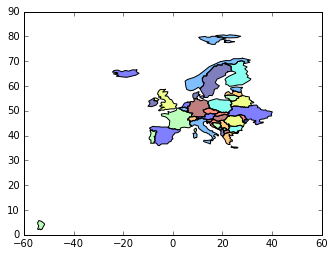

In [9]:
geo_df_EU.plot();

Give columns easy understandable names and remove unncessary columns

In [10]:
geo_df_EU.rename(columns={'admin': 'country', 'pop_est': 'population'},inplace=True )
geo_df_EU.drop(['pop_density' ], axis=1, inplace=True)

Save results into new shapefle

In [11]:
geo_df_EU.to_file('Shapefile/geo_df_EU.shp', driver="ESRI Shapefile")

In [12]:
geo_df_EU

,geometry,population,country,inf_rate
0,"POLYGON ((20.59024743010491 41.85540416113361,...",3639453.0,Albania,0.356814
1,"POLYGON ((16.97966678230404 48.12349701597631,...",8210281.0,Austria,0.250476
2,"POLYGON ((3.314971144228537 51.34578095153609,...",10414336.0,Belgium,0.855631
3,"POLYGON ((22.65714969248299 44.23492300066128,...",7204687.0,Bulgaria,0.183375
4,"POLYGON ((19.00548628101012 44.86023366960916,...",4613414.0,Bosnia and Herzegovina,0.251521
5,"POLYGON ((23.48412763844985 53.91249766704114,...",9648533.0,Belarus,0.103152
6,"POLYGON ((9.59422610844635 47.52505809182027, ...",7604467.0,Switzerland,0.437561
7,"POLYGON ((16.96028812019458 48.5969823268506, ...",10211904.0,Czech Republic,0.314026
8,"POLYGON ((9.921906365609232 54.98310415304803,...",82329758.0,Germany,0.562518
9,(POLYGON ((12.69000613775563 55.60999095318078...,5500510.0,Denmark,0.277425
